In [1]:
%load_ext autoreload
%autoreload 2
from src.generator.generator import Generator
from PIL import Image
from src.face_frame import face_frame_correction
import torch
from src.nets.MobileNetV2_unet import MobileNetV2_unet
from torchvision import transforms
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import src.face_frame as face_frame

In [2]:
gen = Generator("https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-256x256.pkl")
#gen = Generator("http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl")


In [3]:
w_avg = gen.G.mapping.w_avg

In [4]:
w_avg = w_avg.repeat(1, gen.G.mapping.num_ws, 1).to(gen.device)

In [5]:
z = torch.from_numpy(np.random.RandomState(
            13).randn(1, gen.G.z_dim)).to(gen.device)
w_random = gen.G.mapping(z=z, c=None, truncation_psi=0.5)

Setting up PyTorch plugin "bias_act_plugin"... Done.


In [6]:
z = torch.from_numpy(np.random.RandomState(
            13).randn(1, gen.G.z_dim)).to(gen.device)
w_random_n = gen.G.mapping(z=z, c=None, truncation_psi=-0.5)

Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


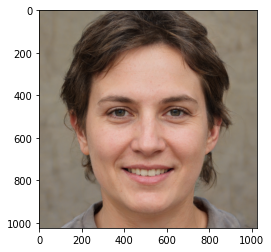

In [7]:
image = gen.G.synthesis(w_avg, noise_mode='const')
image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
image = image[0].cpu().numpy()
plt.imshow(image)


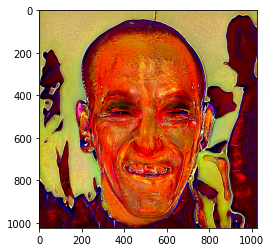

In [8]:
#1 - avg
w_neg =  2-w_avg
image = gen.G.synthesis(w_neg, noise_mode='const')
image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
image = image[0].cpu().numpy()
plt.imshow(image)

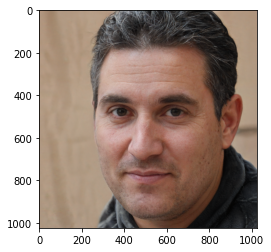

In [9]:
image = gen.G.synthesis(w_random, noise_mode='const')
image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
image = image[0].cpu().numpy()
plt.imshow(image)

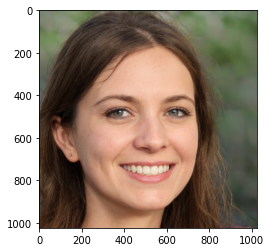

In [10]:
image = gen.G.synthesis(w_random_n, noise_mode='const')
image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
image = image[0].cpu().numpy()
plt.imshow(image)

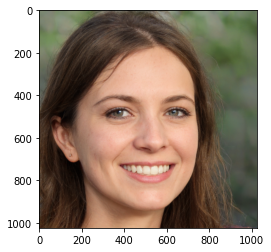

In [11]:
delta = w_random - w_avg
w_test = w_avg - delta
image = gen.G.synthesis(w_test, noise_mode='const')
image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
image = image[0].cpu().numpy()
plt.imshow(image)

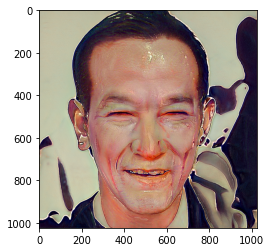

In [12]:
w_ultrarandom = np.random.RandomState().randn(1, gen.G.mapping.num_ws,gen.G.z_dim)
w_ultrarandom = np.abs(w_ultrarandom)
image = gen.G.synthesis(torch.from_numpy(w_ultrarandom).to(gen.device), noise_mode='const')
image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
image = image[0].cpu().numpy()
plt.imshow(image)

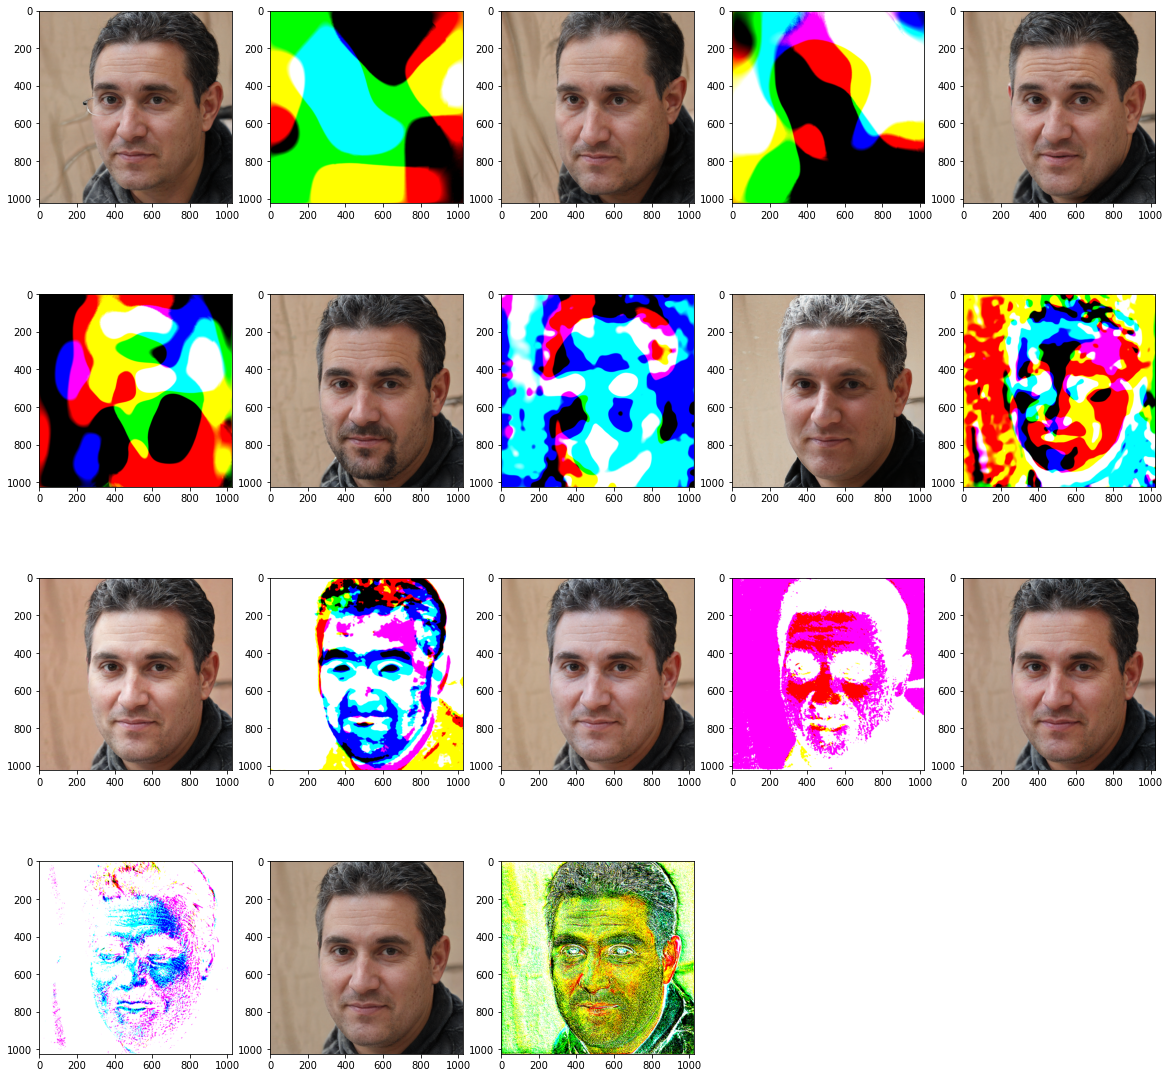

In [18]:
plt.figure(figsize=(20, 20))
for i in range(gen.G.mapping.num_ws):
    plt.subplot(4, 5, i+1)
    w = w_random.clone()
    #w[:, i, :] = 2*w_avg[:, i, :] - w[:, i, :]
    w[:, i, :] *= 8000
    image = gen.G.synthesis(w, noise_mode='const')
    image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    image = image[0].cpu().numpy()
    plt.imshow(image)
    #plt.show()
plt.show()

/tmp/ipykernel_321/1480327920.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(4, 4, i/32+1)


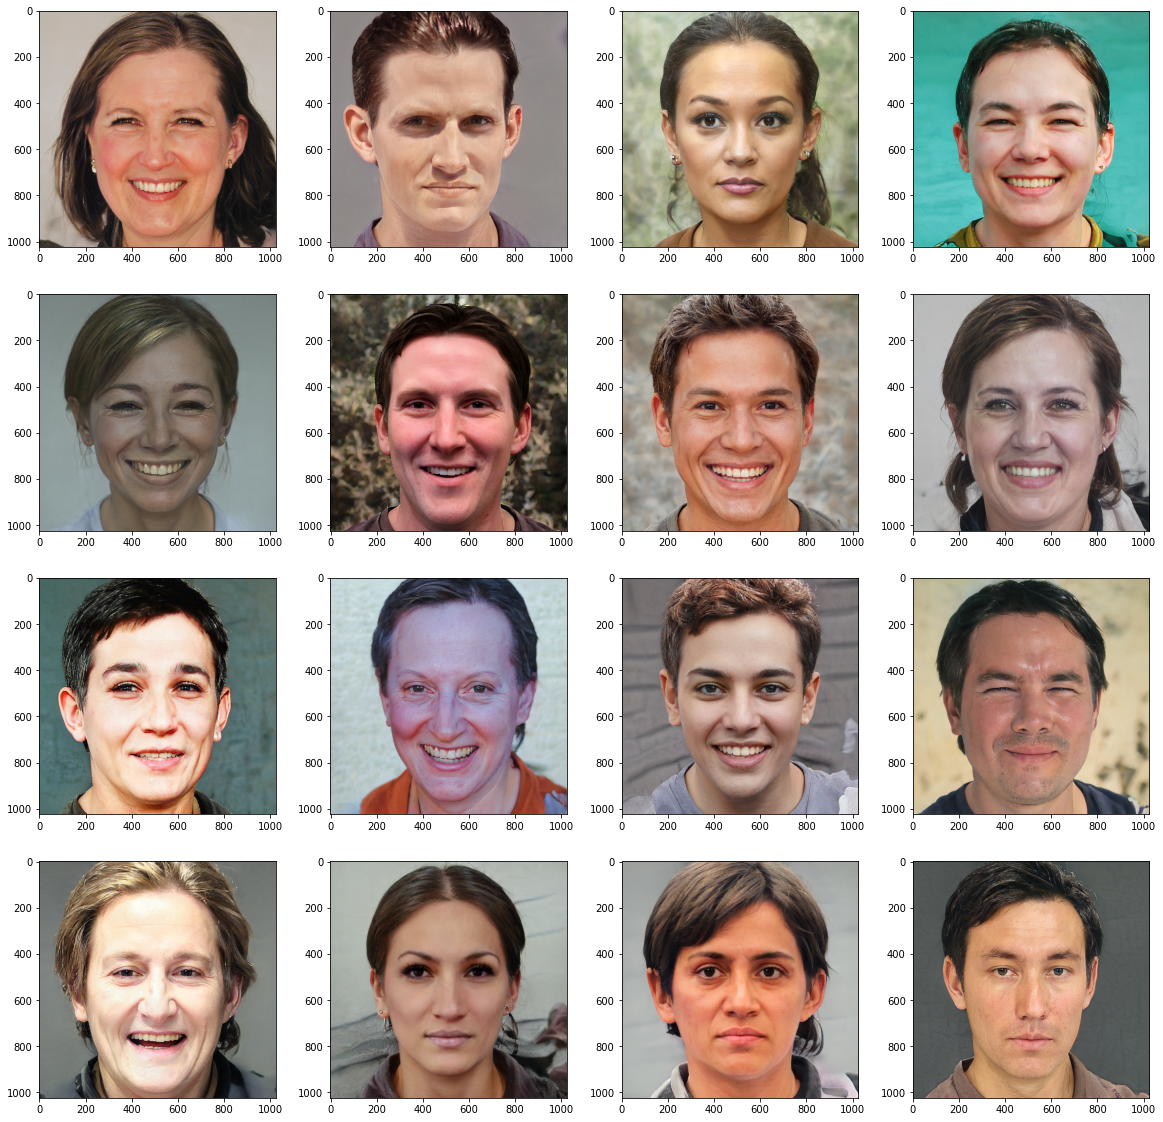

In [19]:
plt.figure(figsize=(20, 20))
for i in range(0,gen.G.mapping.z_dim, 32):
    w = w_avg.clone()
    w[:, :, i:i+32] += 2
    image = gen.G.synthesis(w, noise_mode='const')
    image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    image = image[0].cpu().numpy()
    plt.subplot(4, 4, i/32+1)
    plt.imshow(image)